In [ ]:
!pip install sumy

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import Request, urlopen
import seaborn as sns
import requests
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [ ]:
surahs_links = []
for i in range(1,115):
  if i < 10:
   surahs_links.append("/00"+ str(i))
  elif i < 100:
    surahs_links.append("/0" + str(i))
  else:
    surahs_links.append("/" + str(i))
print(surahs_links)

['/001', '/002', '/003', '/004', '/005', '/006', '/007', '/008', '/009', '/010', '/011', '/012', '/013', '/014', '/015', '/016', '/017', '/018', '/019', '/020', '/021', '/022', '/023', '/024', '/025', '/026', '/027', '/028', '/029', '/030', '/031', '/032', '/033', '/034', '/035', '/036', '/037', '/038', '/039', '/040', '/041', '/042', '/043', '/044', '/045', '/046', '/047', '/048', '/049', '/050', '/051', '/052', '/053', '/054', '/055', '/056', '/057', '/058', '/059', '/060', '/061', '/062', '/063', '/064', '/065', '/066', '/067', '/068', '/069', '/070', '/071', '/072', '/073', '/074', '/075', '/076', '/077', '/078', '/079', '/080', '/081', '/082', '/083', '/084', '/085', '/086', '/087', '/088', '/089', '/090', '/091', '/092', '/093', '/094', '/095', '/096', '/097', '/098', '/099', '/100', '/101', '/102', '/103', '/104', '/105', '/106', '/107', '/108', '/109', '/110', '/111', '/112', '/113', '/114']


In [ ]:
data = {
    'Surah': [],
    'Verse Number': [],
    'Translation': []
}
url = "https://www.clearquran.com"
for i in surahs_links:
    page = requests.get(url + i +".html")
    soup = BeautifulSoup(page.content, "html.parser")
    surah_name_arabic_element = soup.find('p', id='chNameAr')
    if surah_name_arabic_element:
      surah_name_arabic = surah_name_arabic_element.get_text().strip()
      print(surah_name_arabic)
    verses = soup.find_all('p')
    for verse in verses:
      verse_number_element = verse.find('span')
      if verse_number_element:
        verse_number = verse_number_element.text.strip()
        verse_number = verse_number.replace('.','')
        verse_text = verse.get_text().replace(verse_number, '').strip()
        data['Surah'].append(surah_name_arabic)
        data['Translation'].append(verse_text.lstrip(". "))
        data['Verse Number'].append(int(verse_number))

al-Fatihah
al-Baqarah
Ali 'Imran
an-Nisa'
al-Ma'idah
al-An'am
al-A'raf
al-Anfal
at-Tawbah
Yunus
Hud
Yusuf
ar-Ra'd
Ibrahim
al-Hijr
an-Nahl
al-Isra'
al-Kahf
Maryam
Ta-Ha
al-Anbiya
al-Hajj
al-Mu'minun
an-Nur
al-Furqan
ash-Shu'ara'
an-Naml
al-Qasas
al-'Ankabut
ar-Rum
Luqman
as-Sajdah
al-Ahzab
Saba'
Fatir
Ya-Seen
as-Saffat
Saad
az-Zumar
Ghafir
Fussilat
ash-Shura
az-Zukhruf
ad-Dukhan
al-Jathiyah
al-Ahqaf
Muhammad
al-Fath
al-Hujurat
Qaf
adh-Dhariyat
at-Tur
an-Najm
al-Qamar
ar-Rahman
al-Waqi'ah
al-Hadid`
al-Mujadilah
al-Hashr
al-Mumtahina
as-Saff
al-Jumu'ah
al-Munafiqun
at-Taghabun
at-Talaq
at-Tahrim
al-Mulk
al-Qalam
al-Haqqah
al-Ma'arij
Nuh
al-Jinn
al-Muzzammil
al-Muddathir
al-Qiyamah
al-Insan
al-Mursalat
an-Naba'
an-Nazi'at
'Abasa
at-Takwir
al-Infitar
al-Mutaffifin
al-Inshiqaq
al-Buruj
at-Tariq
al-A'la
al-Ghashiyah
al-Fajr
al-Balad
ash-Shams
al-Layl
adh-Duha
ash-Sharh
at-Tin
al-'Alaq
al-Qadr
al-Bayyinah
az-Zalzalah
al-'Adiyat
al-Qari'ah
at-Takathur
al-'Asr
al-Humazah
al-Fil
Quraysh
al-Ma'un


In [ ]:
df_verses = pd.DataFrame(data)
df_verses

,Surah,Verse Number,Translation
0,al-Fatihah,1,"In the name of God, the Gracious, the Merciful."
1,al-Fatihah,2,"Praise be to God, Lord of the Worlds."
2,al-Fatihah,3,"The Most Gracious, the Most Merciful."
3,al-Fatihah,4,Master of the Day of Judgment.
4,al-Fatihah,5,"It is You we worship, and upon You we call for..."
...,...,...,...
6231,an-Nas,2,The King of mankind.
6232,an-Nas,3,The God of mankind.
6233,an-Nas,4,From the evil of the sneaky whisperer.
6234,an-Nas,5,Who whispers into the hearts of people.


In [ ]:
URL = "https://sunnah.com/"

# Send a GET request to the website
response = requests.get(URL)

# Create a BeautifulSoup object from the response content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the <a> elements that contain hadith links
table = soup.find('div', class_="collections")
hadith_links = table.find_all('a')

In [ ]:
# Iterate over the hadith links and print their text
df = pd.DataFrame()
titles=[]
for link in hadith_links:
    hadith_link = link['href']
    hadith_book = link.find('div',class_="english_collection_title")
    response = requests.get(str(URL+hadith_link))
    # Create a BeautifulSoup object from the response content
    soup = BeautifulSoup(response.content, 'html.parser')
    temp = soup.find('div',class_="book_titles titles")
    if temp:
        hadith_books_links = temp.find_all('a')
        book_range = temp.find_all('div',class_="book_range")
        if hadith_books_links:
            for book, range_value in zip(hadith_books_links, book_range):
                book_name = book.find('div', class_="english english_book_name").text.strip()
                if book_range:
                  book_range_value = range_value.text.strip()
                else:
                  book_range_value = 'NaN'
                hadith_text_link = book['href']
                response = requests.get(str(URL+hadith_text_link))
                soup = BeautifulSoup(response.content, 'html.parser')
                temp2 = soup.find_all('div',class_="hadithTextContainers")
                if temp2:
                  for narration in temp2:
                    translation = narration.find('div',class_="text_details")
                    df = df.append({'Hadith Collection': hadith_book.text.strip(),
                                'Book Name': book_name,
                                'Translation': translation.text.strip()}, ignore_index=True)

In [ ]:
df_hadiths = df
df_hadiths

,Hadith Collection,Book Name,Translation,Sentiment
0,Sahih al-Bukhari,Revelation,"I heard Allah's Messenger (ﷺ) saying, ""The rew...",Neutral
1,Sahih al-Bukhari,Revelation,(the mother of the faithful believers) Al-Hari...,Negative
2,Sahih al-Bukhari,Revelation,The commencement of the Divine Inspiration to ...,Positive
3,Sahih al-Bukhari,Revelation,"""While I was walking, all of a sudden I heard ...",Negative
4,Sahih al-Bukhari,Revelation,Ibn 'Abbas in the explanation of the statement...,Positive
...,...,...,...,...
43858,Bulugh al-Maram,Fasting,The one who is performing I'tikaf does not hav...,Positive
43859,Bulugh al-Maram,Fasting,"Ibn ’Umar (RAA) narrated, ‘Some of the compani...",Positive
43860,Bulugh al-Maram,Fasting,"Mu'awiyah bin Abi Sufian (RAA) narrated, ’The ...",Positive
43861,Bulugh al-Maram,Fasting,"O Allah, You are the Pardoner and You love to ...",Positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all the scraped text into a single list
all_text = df_verses['Translation'].tolist() + df_hadiths['Translation'].tolist()

# Define keywords related to the Five Pillars
five_pillars_keywords = {
    'Shahada': ['faith', 'testimony', 'there is no god but Allah', 'Muhammad is the messenger of Allah'],
    'Salat': ['prayer', 'worship', 'ritual prayer', 'five daily prayers'],
    'Zakat': ['charity', 'almsgiving', 'obligatory charity', 'giving back'],
    'Sawm': ['fasting', 'Ramadan', 'abstaining', 'self-discipline'],
    'Hajj': ['pilgrimage', 'Mecca', 'Kaaba', 'spiritual journey']
}

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(all_text)

# Extract keywords related to each pillar using TF-IDF scores
pillar_keywords = {}
for pillar, keywords in five_pillars_keywords.items():
    keyword_scores = {}
    for keyword in keywords:
        keyword_index = vectorizer.vocabulary_.get(keyword)
        if keyword_index:
            keyword_score = tfidf_matrix[:, keyword_index].sum()
            keyword_scores[keyword] = keyword_score
    pillar_keywords[pillar] = keyword_scores

# Print the extracted keywords for each pillar
for pillar, keywords in pillar_keywords.items():
    print(f"{pillar} Keywords:", keywords)


Shahada Keywords: {'faith': 87.22663956433881, 'testimony': 23.126595653563196}
Salat Keywords: {'prayer': 773.2445765770323, 'worship': 93.70384634644294}
Zakat Keywords: {'charity': 132.55223889764721, 'almsgiving': 1.416515112607561}
Sawm Keywords: {'fasting': 162.4312061781628, 'abstaining': 0.09517096665853784}
Hajj Keywords: {'pilgrimage': 42.815972457758505}


In [ ]:
from textblob import TextBlob

# Perform sentiment analysis on the scraped text
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return 'Positive' if sentiment > 0 else 'Negative' if sentiment < 0 else 'Neutral'

# Add a sentiment column to your dataframes
df_verses['Sentiment'] = df_verses['Translation'].apply(analyze_sentiment)
df_hadiths['Sentiment'] = df_hadiths['Translation'].apply(analyze_sentiment)


In [ ]:
# Sample categorized verses for illustration purposes
pillar_keywords = {
    'Shahada': ['faith', 'believe', 'monotheism', 'God', 'submit', 'testimony'],
    'Salat': ['prayer', 'salat', 'worship', 'bow', 'prostrate', 'mosque'],
    'Zakat': ['charity', 'zakat', 'give', 'poor', 'alms', 'wealth'],
    'Sawm': ['fasting', 'sawm', 'Ramadan', 'abstain', 'food', 'drink'],
    'Hajj': ['pilgrimage', 'hajj', 'Mecca', 'Kaaba', 'pilgrim', 'circumambulate']
}

df_verses['Category'] = None  # Initialize the 'Category' column with None

for index, row in df_verses.iterrows():
    verse_text = row['Translation'].lower()  # Convert to lowercase for easier keyword matching
    for pillar, keywords in pillar_keywords.items():
        if any(keyword.lower() in verse_text for keyword in keywords):
            df_verses.at[index, 'Category'] = pillar

In [ ]:
df_verses

,Surah,Verse Number,Translation,Sentiment,Category
0,al-Fatihah,1,"In the name of God, the Gracious, the Merciful.",Neutral,Shahada
1,al-Fatihah,2,"Praise be to God, Lord of the Worlds.",Neutral,Shahada
2,al-Fatihah,3,"The Most Gracious, the Most Merciful.",Positive,None
3,al-Fatihah,4,Master of the Day of Judgment.,Neutral,None
4,al-Fatihah,5,"It is You we worship, and upon You we call for...",Neutral,Salat
...,...,...,...,...,...
6231,an-Nas,2,The King of mankind.,Neutral,None
6232,an-Nas,3,The God of mankind.,Neutral,Shahada
6233,an-Nas,4,From the evil of the sneaky whisperer.,Negative,None
6234,an-Nas,5,Who whispers into the hearts of people.,Neutral,None


In [ ]:
# Sample categorized verses for illustration purposes
pillar_keywords = {
    'Shahada': ['faith', 'believe', 'monotheism', 'God', 'submit', 'testimony'],
    'Salat': ['prayer', 'salat', 'worship', 'bow', 'prostrate', 'mosque'],
    'Zakat': ['charity', 'zakat', 'give', 'poor', 'alms', 'wealth'],
    'Sawm': ['fasting', 'sawm', 'Ramadan', 'abstain', 'food', 'drink'],
    'Hajj': ['pilgrimage', 'hajj', 'Mecca', 'Kaaba', 'pilgrim', 'circumambulate']
}

df_hadiths['Category'] = None  # Initialize the 'Category' column with None

for index, row in df_hadiths.iterrows():
    verse_text = row['Translation'].lower()  # Convert to lowercase for easier keyword matching
    for pillar, keywords in pillar_keywords.items():
        if any(keyword.lower() in verse_text for keyword in keywords):
            df_hadiths.at[index, 'Category'] = pillar

In [ ]:
df_hadiths

,Hadith Collection,Book Name,Translation,Sentiment,Category
0,Sahih al-Bukhari,Revelation,"I heard Allah's Messenger (ﷺ) saying, ""The rew...",Neutral,None
1,Sahih al-Bukhari,Revelation,(the mother of the faithful believers) Al-Hari...,Negative,Shahada
2,Sahih al-Bukhari,Revelation,The commencement of the Divine Inspiration to ...,Positive,Sawm
3,Sahih al-Bukhari,Revelation,"""While I was walking, all of a sudden I heard ...",Negative,None
4,Sahih al-Bukhari,Revelation,Ibn 'Abbas in the explanation of the statement...,Positive,Zakat
...,...,...,...,...,...
43858,Bulugh al-Maram,Fasting,The one who is performing I'tikaf does not hav...,Positive,None
43859,Bulugh al-Maram,Fasting,"Ibn ’Umar (RAA) narrated, ‘Some of the compani...",Positive,Sawm
43860,Bulugh al-Maram,Fasting,"Mu'awiyah bin Abi Sufian (RAA) narrated, ’The ...",Positive,Sawm
43861,Bulugh al-Maram,Fasting,"O Allah, You are the Pardoner and You love to ...",Positive,None


In [ ]:
from gensim import corpora, models

# Combine all the scraped text into a single list
all_text_combined = df_verses['Translation'].tolist() + df_hadiths['Translation'].tolist()

# Create a list of tokens from the text
tokenized_text = [text.split() for text in all_text_combined]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics and their associated keywords
for topic_num, topic_words in lda_model.print_topics():
    print(f"Topic {topic_num + 1}: {topic_words}")


Topic 1: 0.039*"and" + 0.035*"the" + 0.032*"of" + 0.032*"to" + 0.032*"I" + 0.027*"you" + 0.027*"said:" + 0.024*"Allah" + 0.024*"He" + 0.015*"him"
Topic 2: 0.031*"Related" + 0.026*"wa" + 0.018*"(RAA)" + 0.018*"You" + 0.014*"refuge" + 0.014*"seek" + 0.013*"graded" + 0.012*"Sahih." + 0.009*"Hibban" + 0.009*"Zakah"
Topic 3: 0.075*"the" + 0.051*"of" + 0.023*"and" + 0.023*"is" + 0.015*"Abu" + 0.014*"in" + 0.013*"Messenger" + 0.013*"transmitted" + 0.012*"on" + 0.011*"Allah"
Topic 4: 0.047*"the" + 0.045*"and" + 0.035*"he" + 0.029*"to" + 0.029*"of" + 0.022*"his" + 0.021*"was" + 0.021*"a" + 0.016*"(ﷺ)" + 0.015*"Messenger"
Topic 5: 0.036*"and" + 0.034*"the" + 0.029*"a" + 0.026*"to" + 0.025*"of" + 0.024*"is" + 0.022*"who" + 0.020*"will" + 0.018*"for" + 0.016*"it"


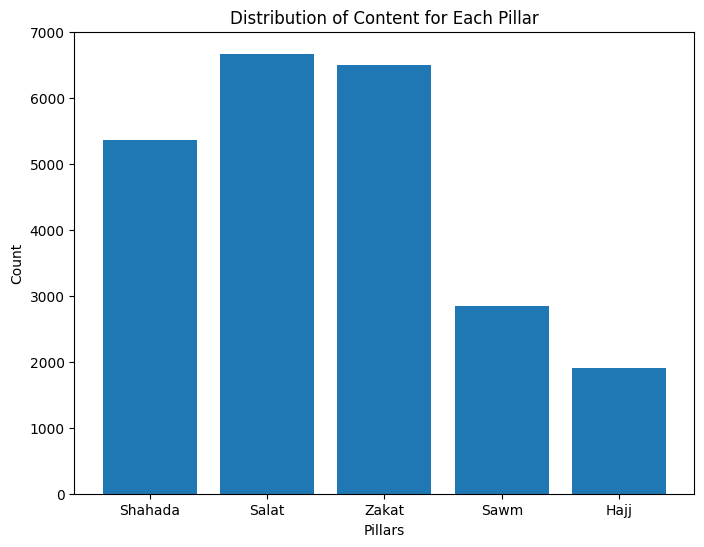

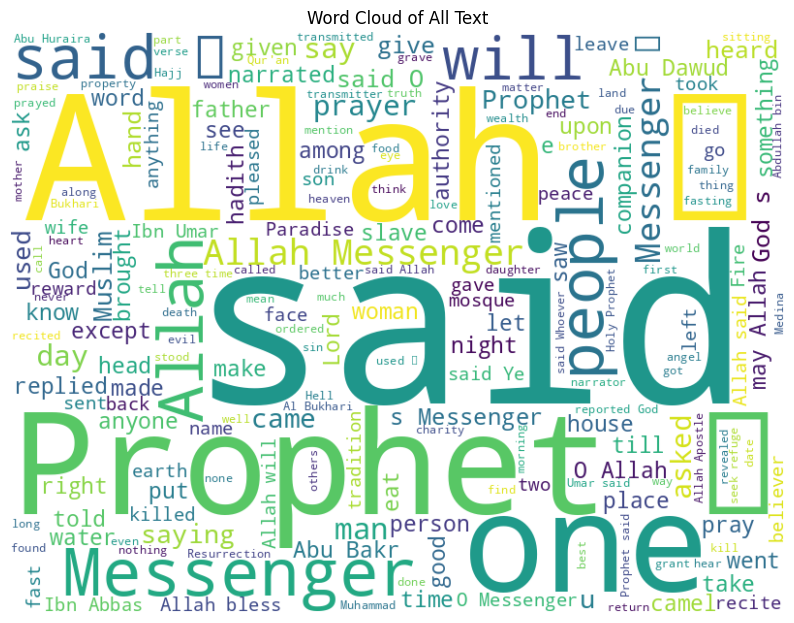

In [ ]:

# Generate bar graphs
def generate_bar_graph(data, title):
    plt.figure(figsize=(8, 6))
    plt.bar(data.keys(), data.values())
    plt.title(title)
    plt.xlabel('Pillars')
    plt.ylabel('Count')
    plt.show()

# Generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


pillar_data = {
    'Shahada': len(df_verses[df_verses['Category'] == 'Shahada']) + len(df_hadiths[df_hadiths['Category'] == 'Shahada']),
    'Salat': len(df_verses[df_verses['Category'] == 'Salat']) + len(df_hadiths[df_hadiths['Category'] == 'Salat']),
    'Zakat': len(df_verses[df_verses['Category'] == 'Zakat']) + len(df_hadiths[df_hadiths['Category'] == 'Zakat']),
    'Sawm': len(df_verses[df_verses['Category'] == 'Sawm']) + len(df_hadiths[df_hadiths['Category'] == 'Sawm']),
    'Hajj': len(df_verses[df_verses['Category'] == 'Hajj']) + len(df_hadiths[df_hadiths['Category'] == 'Hajj'])
}

# Generate a bar graph for pillar distribution
generate_bar_graph(pillar_data, 'Distribution of Content for Each Pillar')

# Combine all the scraped text for the word cloud
all_text_combined = ' '.join(df_verses['Translation']) + ' ' + ' '.join(df_hadiths['Translation'])

# Generate a word cloud for all scraped text
generate_word_cloud(all_text_combined, 'Word Cloud of All Text')

In [ ]:
import nltk; nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def generate_summaries(dataframes, sentences_count=5):
    summaries = {}
    for pillar, dfs in dataframes.items():
        # Combine the 'Translation' column data from the DataFrames for each pillar
        pillar_text = ' '.join(df['Translation'].str.cat(sep=' ') for df in dfs)

        # Create a parser and tokenizer for the pillar text
        parser = PlaintextParser.from_string(pillar_text, Tokenizer('english'))

        # Initialize LexRankSummarizer and generate a summary
        summarizer = LexRankSummarizer()
        summary = summarizer(parser.document,sentences_count=sentences_count)

        # Join the summary sentences into a single string
        summary_text = ' '.join([str(sentence) for sentence in summary])
        summaries[pillar] = summary_text
    return summaries

# Assuming you have DataFrames df_verses and df_hadiths
dataframes_per_pillar = {
    'Shahada': [df_verses[df_verses['Category'] == 'Shahada'], df_hadiths[df_hadiths['Category'] == 'Shahada']],
    'Salat': [df_verses[df_verses['Category'] == 'Salat'], df_hadiths[df_hadiths['Category'] == 'Salat']],
    'Zakat': [df_verses[df_verses['Category'] == 'Zakat'], df_hadiths[df_hadiths['Category'] == 'Zakat']],
    'Sawm': [df_verses[df_verses['Category'] == 'Sawm'], df_hadiths[df_hadiths['Category'] == 'Sawm']],
    'Hajj': [df_verses[df_verses['Category'] == 'Hajj'], df_hadiths[df_hadiths['Category'] == 'Hajj']]
}

pillar_summaries = generate_summaries(dataframes_per_pillar)

# Print the summaries for each pillar
for pillar, summary in pillar_summaries.items():
    print(f"{pillar} Summary:\n{summary}\n")